In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('..')

In [4]:
import src
from src.infra.registry import DATASET_REGISTRY
DATASET_REGISTRY

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


{'Dataset': torch.utils.data.dataset.Dataset,
 'SingleFaustDataset': src.dataset.shape_cor.SingleFaustDataset,
 'SingleScapeDataset': src.dataset.shape_cor.SingleScapeDataset,
 'SingleShrec19Dataset': src.dataset.shape_cor.SingleShrec19Dataset,
 'SingleSmalDataset': src.dataset.shape_cor.SingleSmalDataset,
 'SingleDT4DDataset': src.dataset.shape_cor.SingleDT4DDataset,
 'SingleShrec20Dataset': src.dataset.shape_cor.SingleShrec20Dataset,
 'SingleTopKidsDataset': src.dataset.shape_cor.SingleTopKidsDataset,
 'PairDataset': src.dataset.shape_cor.PairDataset,
 'PairFaustDataset': src.dataset.shape_cor.PairFaustDataset,
 'PairScapeDataset': src.dataset.shape_cor.PairScapeDataset,
 'PairShrec19Dataset': src.dataset.shape_cor.PairShrec19Dataset,
 'PairSmalDataset': src.dataset.shape_cor.PairSmalDataset,
 'PairDT4DDataset': src.dataset.shape_cor.PairDT4DDataset,
 'PairShrec20Dataset': src.dataset.shape_cor.PairShrec20Dataset,
 'PairShrec16Dataset': src.dataset.shape_cor.PairShrec16Dataset,
 'Pai

In [5]:
dataset = DATASET_REGISTRY['PairFaustDataset'](
    phase='train',
    data_root='../data/FAUST_r/',
    return_evecs='true',
    return_faces='true',
    num_evecs=200,
    return_corr='true',
    return_dist='true',
)

## Export shapes with textures

In [6]:
from src.utils.tensor import to_numpy
from src.utils.texture import write_obj_with_texture, generate_tex_coords
 
data = dataset[1]
visual_path = 'output'

data_x, data_y = data['first'], data['second']
name_x, name_y = data['first']['name'][0], data['second']['name'][0]
verts_x, verts_y = to_numpy(data_x['verts']), to_numpy(data_y['verts'])
faces_x, faces_y = to_numpy(data_x['faces']), to_numpy(data_y['faces'])

uv_x = generate_tex_coords(verts_x)
write_obj_with_texture(verts_x, faces_x, 'output/export/x.obj', uv=uv_x, texture_name='output/export/texture.png')
uv_y = generate_tex_coords(verts_y)
write_obj_with_texture(verts_y, faces_y, 'output/export/y.obj', uv=uv_y, texture_name='output/export/texture.png')

In [7]:
uv_x.dtype

dtype('float32')

## Export eigenvectors, eigenvalues, & mass matrix

In [8]:
data_x.keys()

dict_keys(['name', 'verts', 'faces', 'evecs', 'evecs_trans', 'evals', 'mass', 'L', 'dist', 'corr'])

In [9]:
data_x['evecs'].shape, data_x['evals'].shape, data_x['mass'].shape

(torch.Size([4999, 200]), torch.Size([200]), torch.Size([4999]))

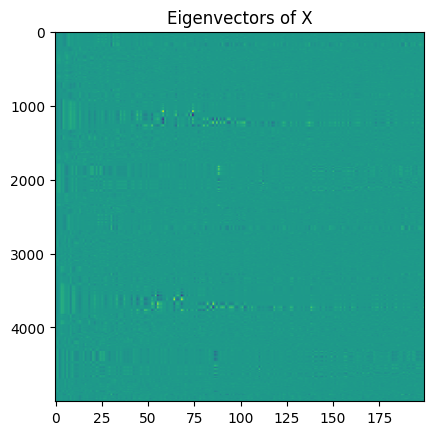

In [10]:
import matplotlib.pyplot as plt
plt.imshow(data_x['evecs'].numpy(), aspect=200/4999)
plt.title('Eigenvectors of X')
plt.show()

In [17]:
data_x['evecs'], data_x['evecs_trans'].T

(tensor([[-1.0000, -0.9598,  0.0108,  ...,  1.1445,  0.6508,  0.2481],
         [-1.0000, -0.9601,  0.0108,  ..., -0.5443,  0.0311,  0.3911],
         [-1.0000, -0.9460,  0.0106,  ...,  0.3931, -0.1110, -0.6522],
         ...,
         [-1.0000, -0.2550, -0.0056,  ..., -0.1576,  0.0867,  0.2636],
         [-1.0000,  0.2403, -0.0215,  ...,  0.0086,  0.8437,  0.4083],
         [-1.0000,  0.1390, -0.0016,  ...,  0.7960, -0.1798,  0.0278]]),
 tensor([[-1.2086e-04, -1.1600e-04,  1.2995e-06,  ...,  1.3832e-04,
           7.8653e-05,  2.9985e-05],
         [-1.3239e-04, -1.2711e-04,  1.4265e-06,  ..., -7.2064e-05,
           4.1174e-06,  5.1785e-05],
         [-8.6101e-05, -8.1456e-05,  9.1039e-07,  ...,  3.3846e-05,
          -9.5540e-06, -5.6156e-05],
         ...,
         [-3.6919e-04, -9.4142e-05, -2.0645e-06,  ..., -5.8170e-05,
           3.2019e-05,  9.7323e-05],
         [-2.9952e-04,  7.1984e-05, -6.4429e-06,  ...,  2.5632e-06,
           2.5271e-04,  1.2228e-04],
         [-7.8465e-

In [22]:
import numpy as np

np.save('output/evecs/evecs_x.npy', data_x['evecs'].numpy())
np.save('output/evecs/evecs_y.npy', data_y['evecs'].numpy())

np.save('output/evecs/evecs_trans_x.npy', data_x['evecs_trans'].numpy())
np.save('output/evecs/evecs_trans_y.npy', data_y['evecs_trans'].numpy())

np.save('output/evecs/evals_x.npy', data_x['evals'].numpy())
np.save('output/evecs/evals_y.npy', data_y['evals'].numpy())

np.save('output/evecs/mass_x.npy', data_x['mass'].numpy())
np.save('output/evecs/mass_y.npy', data_y['mass'].numpy())